# Set 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\PC\Downloads\Data Science\Data Science Assignments\5. Multi Linear regression\50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# no of rows & columns in dataset
data.shape

(50, 5)

In [5]:
#Descriptive Analysis
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Observation: There are no Null Values in the Data set by reading Counts from Above

In [6]:
#Checking for Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Renaming the Columns Name
df = data.copy()
df = data.rename({"R&D Spend":'RDS',"Administration":'ADMS',"Marketing Spend":'MKTS',"State":'State',"Profit":'Profit'},axis=1)
df.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
#Checking for missing values
df.isnull().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [9]:
df[df.values==0.0]

,RDS,ADMS,MKTS,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


Observation: Notice there are some '0' values in the data in some features,

<AxesSubplot:>

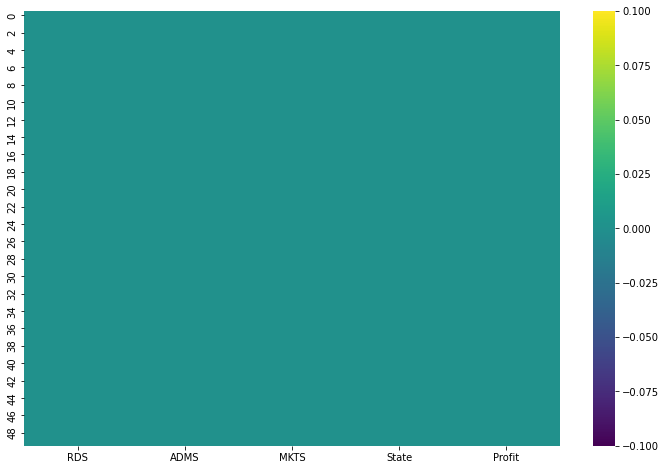

In [10]:
#Visualizing Missing Values using heat map
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

Observation: No missing Values are present in the data set

In [11]:
#Checking for Duplicated Values
df[df.duplicated()].shape

(0, 5)

In [12]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [13]:
df[df.duplicated()]

,RDS,ADMS,MKTS,State,Profit


Observation: There are no duplicated values in the dataset

In [14]:
#Visualizing Continuous Datatype for Outlier Detection
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


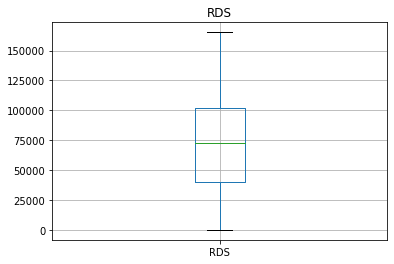

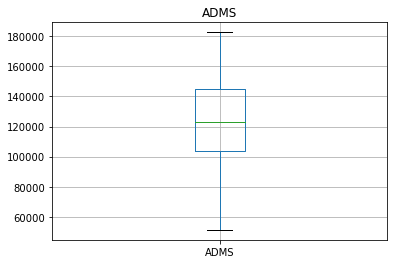

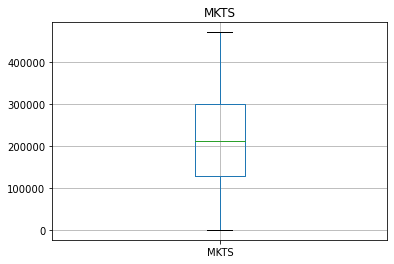

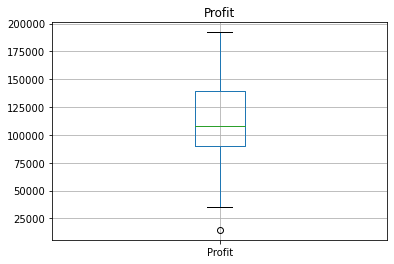

In [15]:
for feature in continuous_feature:
    data=df.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [16]:
#Let's try to find the Outliers in the Profit Dependent Variable
Q1 = np.quantile(df.Profit,0.25)
Q3 = np.quantile(df.Profit,0.75)
med = np.median(df.Profit)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)

print('First Quantile =', Q1,'\n' 'Second Quantile =', med,'\n' 'Third Quantile =', Q3,'\n'
      'Inter-Quartile Range =', IQR,'\n' 'Upper Whisker =', upper_bound,'\n' 'Lower Whisker =', lower_bound)

First Quantile = 90138.9025 
Second Quantile = 107978.19 
Third Quantile = 139765.97749999998 
Inter-Quartile Range = 49627.07499999998 
Upper Whisker = 214206.58999999997 
Lower Whisker = 15698.290000000023


In [17]:
Outliers = df.Profit[(df.Profit <= lower_bound) | (df.Profit >= upper_bound)]
print('The outlier in boxplot:',Outliers)

The outlier in boxplot: 49    14681.4
Name: Profit, dtype: float64


In [18]:
display(df[df.index.isin([49])],df.head())

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x279fd5a2c10>,
 'caps': [<matplotlib.lines.Line2D at 0x279fd5a2820>,
 'boxes': [<matplotlib.lines.Line2D at 0x279fd5a2a00>],
 'medians': [<matplotlib.lines.Line2D at 0x279fd5932b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x279fd593f10>],
 'means': []}

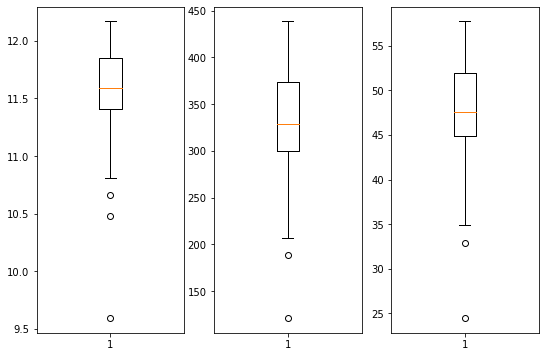

In [19]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['Profit']))

Observation: Even After Transformation we cannot get rid of the outlier

Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

In [20]:
#R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
# Measure goodness-of-fit by finding rsquared values (percentage of variance)
raw_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df).fit()

In [21]:
# Finding rsquared values
raw_model.rsquared , raw_model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

Let's try Median Imputation to handle Outlier in Profit

In [22]:
df.Profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

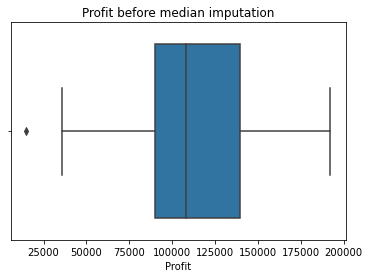

In [23]:
df1=df.copy()
sns.boxplot(df['Profit'])
plt.title('Profit before median imputation')

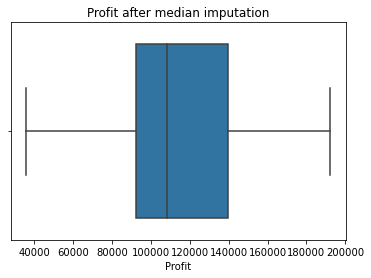

In [24]:
for i in df1['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.median(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after median imputation')
plt.show()

Let's test our data in model and compare the R-squared with Median imputation data model

In [25]:
after_median_imputation_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.9182958360807372, 0.91296730365122)

Observation: As you can see after median imputation the model is not performing well

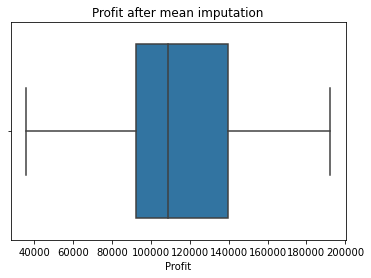

In [26]:
# Let's try Mean Imputation to handle Outlier in Profit
df2=df.copy()
for i in df2['Profit']:
    q1 = np.quantile(df2.Profit,0.25)
    q3 = np.quantile(df2.Profit,0.75)
    med = np.median(df2.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Profit'] = df2['Profit'].replace(i, np.mean(df2['Profit']))
sns.boxplot(df2['Profit'])
plt.title('Profit after mean imputation')
plt.show()

Let's test our data in model and compare the R-squared with Mean imputation data model

In [27]:
after_mean_imputation_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.9119537155310937, 0.9062115665439912)

Observation: As you can see after mean imputation the model is not performing well it got a little worse than the median one

The best thing we can do is now to remove the outlier and see the results

In [28]:
df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

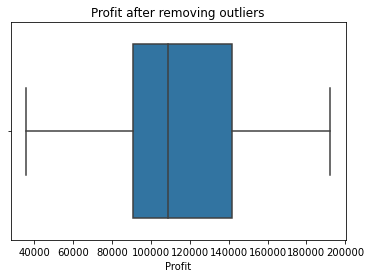

In [29]:
drop_outliers(df3, 'Profit')
sns.boxplot(df3.Profit)
plt.title('Profit after removing outliers')

Let's test our data in model and compare the R-squared with and without imputation data models

In [30]:
removed_outlier_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

Observation: A Slightly better score than the raw data model

# EDA

<AxesSubplot:ylabel='State'>

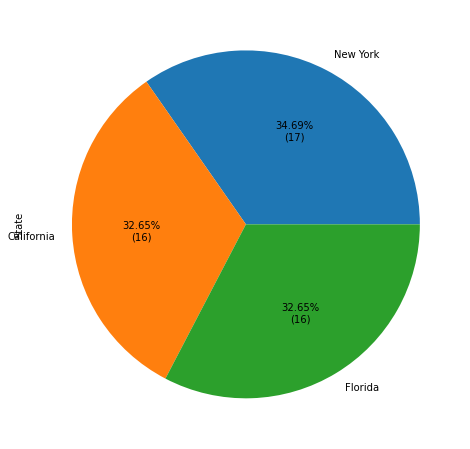

In [31]:
plt.figure(figsize=(8,8))

df3['State'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['State'].value_counts().sum())))

In [32]:
df3.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

In [33]:
df3.columns


Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [34]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('R&D Spend feature',shapiro(df3.RDS),'\n'
     'Administration feature',shapiro(df3.ADMS),'\n'
     'Marketing Spend feature',shapiro(df3.MKTS),'\n'
     'Profit feature',shapiro(df3.Profit))

R&D Spend feature ShapiroResult(statistic=0.9705318212509155, pvalue=0.2542237639427185) 
Administration feature ShapiroResult(statistic=0.9695432186126709, pvalue=0.23222382366657257) 
Marketing Spend feature ShapiroResult(statistic=0.9757168889045715, pvalue=0.401671826839447) 
Profit feature ShapiroResult(statistic=0.9793398380279541, pvalue=0.537902295589447)


Observation: Since the p-values are not less than .05, we fail to reject the null hypothesis.

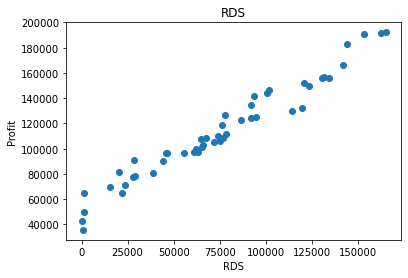

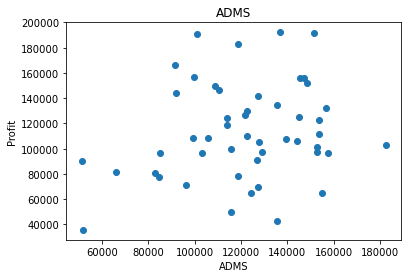

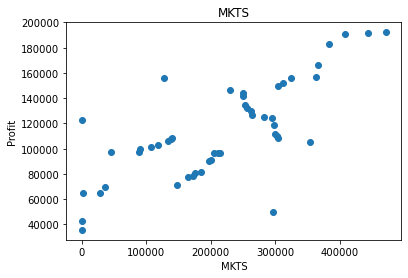

In [35]:
#Visualizing the Relation between each independent Feature with respect to the Dependent Feature
for feature in continuous_feature:
    if feature!="Profit":
        data=df3.copy()         
        plt.scatter(data[feature],data['Profit'])
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.title(feature)
        plt.show()

Observation: R&D feature has a good linear relation with Profit as compare to other features

AttributeError: 'function' object has no attribute 'label'

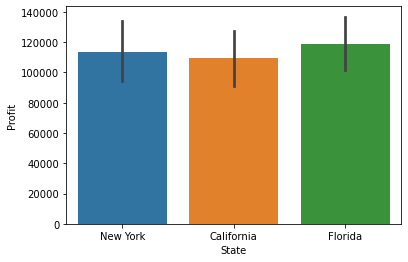

In [36]:
ax = sns.barplot(x = "State", y = 'Profit', data = df3)
for i in ax.containers:
    ax.bar.label(i)

^Observation:There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation

In [39]:
df4=df3.drop('State',axis=1)
df4.head()

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Checking the correlation between Variables

In [40]:
df4.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.243438,0.711654,0.978437
ADMS,0.243438,1.000000,-0.037280,0.205841
MKTS,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


<AxesSubplot:>

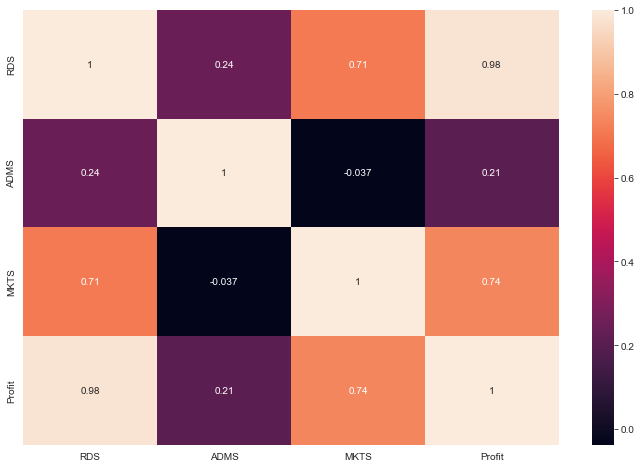

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(), annot=True)

Plotting Correlation on a Pair Plot

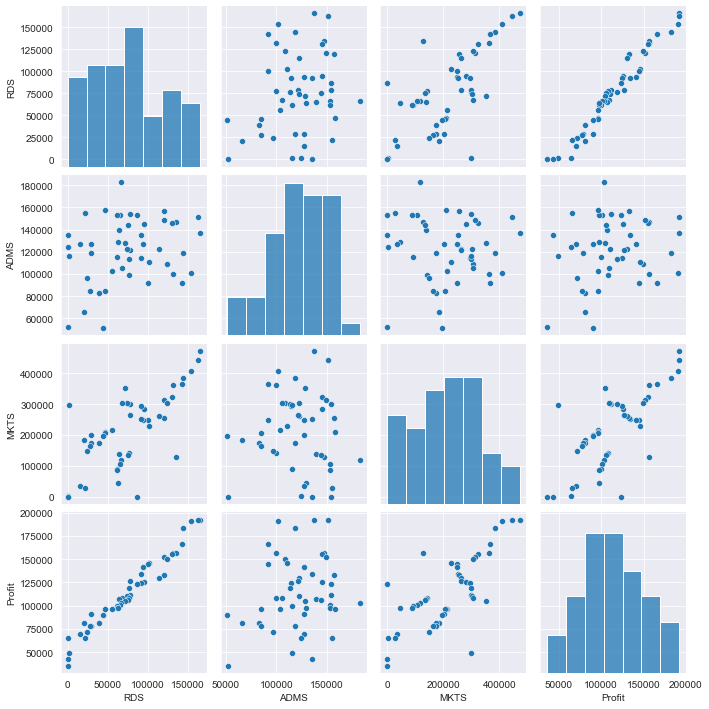

In [42]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

^Observation: R&D has the highest score of correlation with Profit

# Model Building

In [43]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()

# Model Testing

In [46]:
# Finding Coefficient parameters

model.params

Intercept    52382.439251
RDS              0.783002
ADMS            -0.022201
MKTS             0.025234
dtype: float64

In [47]:
# Finding tvalues and pvalues

model.tvalues , np.round(model.pvalues,)

(Intercept     9.450782
 RDS          20.469501
 ADMS         -0.517889
 MKTS          1.825383
 dtype: float64,
 Intercept    0.0
 RDS          0.0
 ADMS         1.0
 MKTS         0.0
 dtype: float64)

In [48]:

# Finding rsquared values

model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%


(0.9613162435129847, 0.9587373264138503)

In [49]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [50]:
slr_a=smf.ols("Profit~ADMS",data=df4).fit()
slr_a.tvalues , slr_a.pvalues       # ADMS has in-significant pvalue

(Intercept    3.346236
 ADMS         1.442053
 dtype: float64,
 Intercept    0.001618
 ADMS         0.155918
 dtype: float64)

In [51]:

slr_m=smf.ols("Profit~MKTS",data=df4).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    8.427541
 MKTS         7.526983
 dtype: float64,
 Intercept    5.905020e-11
 MKTS         1.304853e-09
 dtype: float64)

In [52]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=df4).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.474103
 ADMS         2.508234
 MKTS         8.027366
 dtype: float64,
 Intercept    1.472650e-01
 ADMS         1.572324e-02
 MKTS         2.695219e-10
 dtype: float64)

# Model Validation

# Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [53]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=df4).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=df4).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=df4).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.377754
1,ADMS,1.175172
2,MKTS,2.239957


In [54]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression eq


In [55]:
Residual Analysis

SyntaxError: invalid syntax (1311629920.py, line 1)

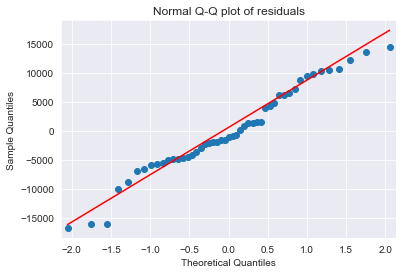

In [56]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [57]:
list(np.where(model.resid<-30000))

[array([], dtype=int64)]

In [58]:
Residual Plot for Homoscedasticity

SyntaxError: invalid syntax (926995611.py, line 1)

In [59]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

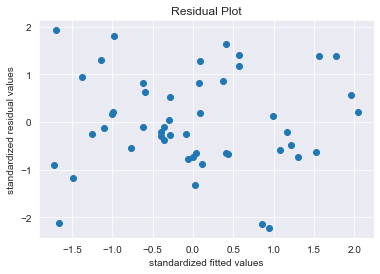

In [60]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [61]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)   

eval_env: 1


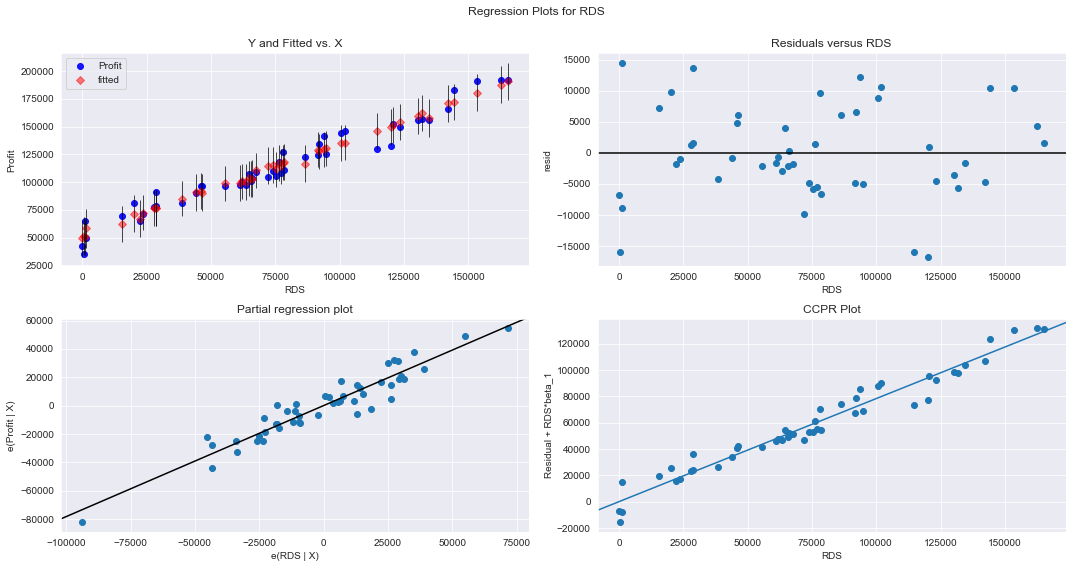

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


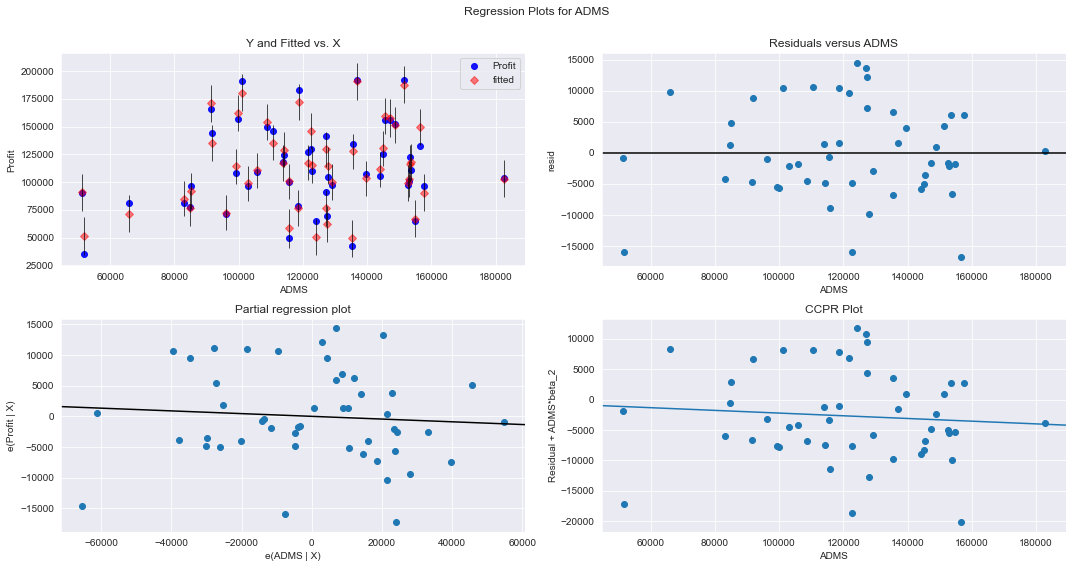

In [63]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


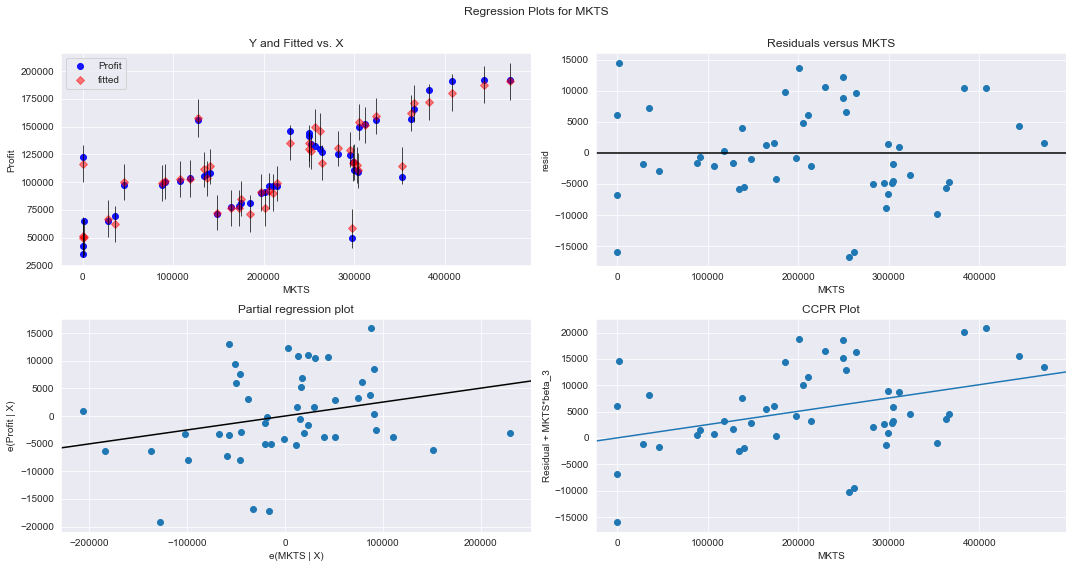

In [64]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

#Model Deletion Diagnostics (checking Outliers or Influencers)


#Two Techniques : 1. Cook's Distance & 2. Leverage value

In [65]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
 
influence_points=model.get_influence()
c, p_value=influence_points.cooks_distance

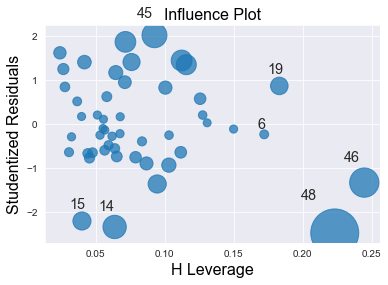

In [66]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

influence_plot(model)
plt.show()

In [67]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.30612244897959184

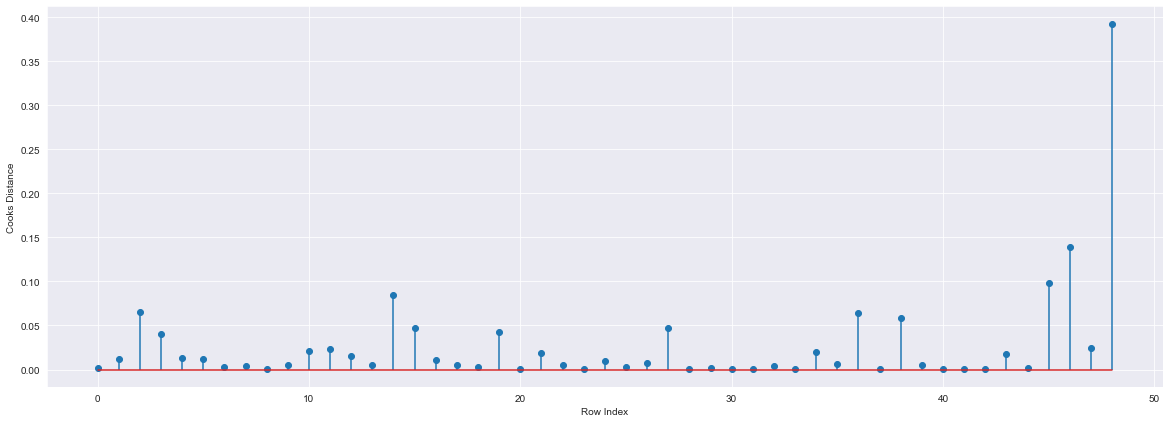

In [68]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

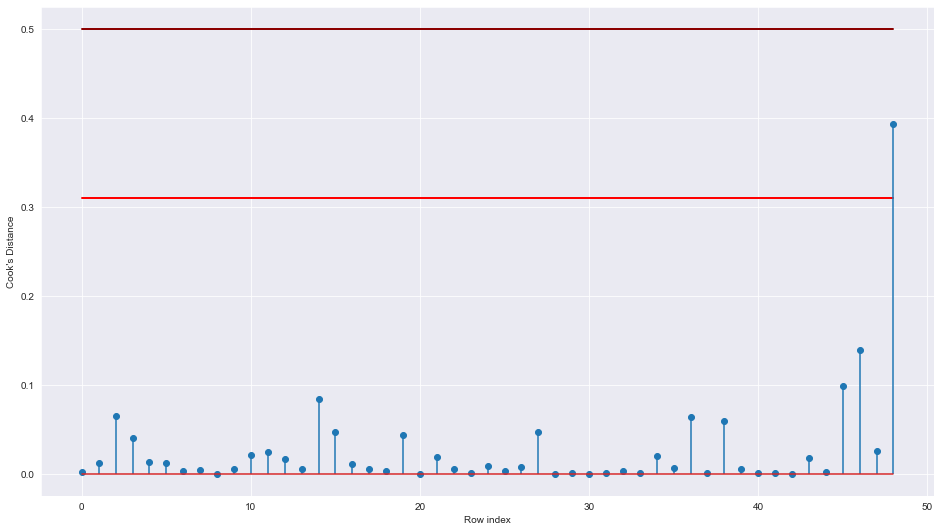

In [69]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

# Model Deletion Diagnostics and Final Model


In [70]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()


In [71]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df4=df4.drop(df4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df4
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [72]:
final_model.rsquared 

0.9882757054424702

In [73]:
df4

,RDS,ADMS,MKTS,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96
5,91992.39,135495.07,252664.93,134307.35
6,94657.16,145077.58,282574.31,125370.37
7,91749.16,114175.79,294919.57,124266.90
8,76253.86,113867.30,298664.47,118474.03
9,67532.53,105751.03,304768.73,108733.99


# Model Predictions

In [74]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [75]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [76]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

#table containing R^2 value for each prepared model

In [77]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.961316
1,Final_Model,0.988276


In [78]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Final_Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),np.sqrt(final_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Final_Model,0.988276,0.986746,3177.423324


#Visualizing Models Performance

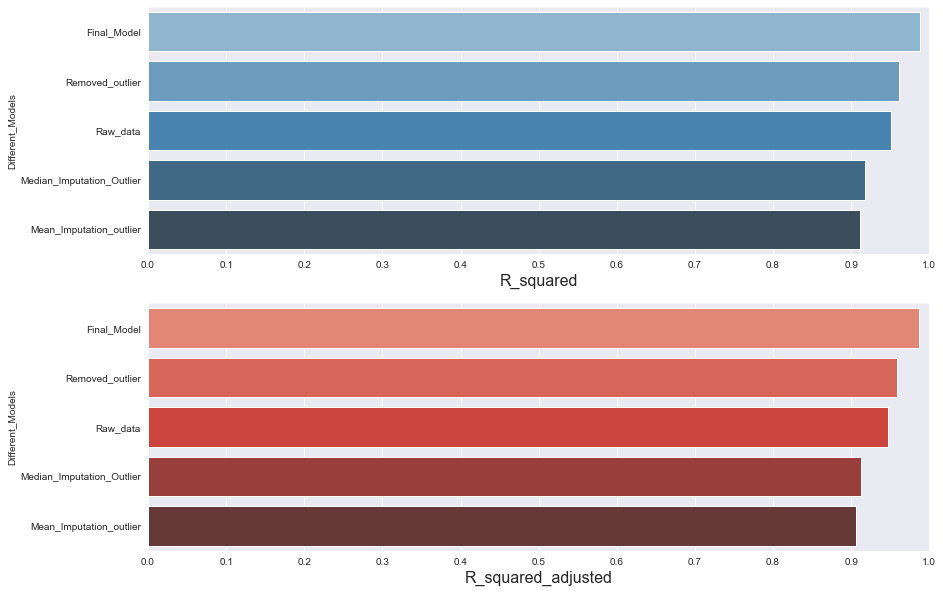

In [79]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

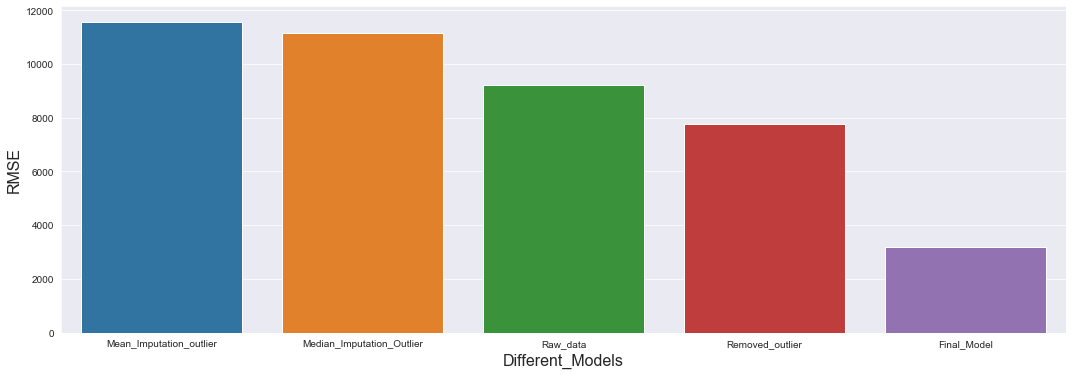

In [80]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Set 2

In [83]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [85]:
car = pd.read_csv(r'C:\Users\PC\Downloads\Data Science\Data Science Assignments\5. Multi Linear regression\ToyotaCorolla.csv',encoding='latin1')
car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [86]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [87]:
car.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [88]:
car.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [89]:
car1=pd.concat([car.iloc[:,2:4],car.iloc[:,6:7],car.iloc[:,8:9],car.iloc[:,12:14],car.iloc[:,15:18]],axis=1)
car1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


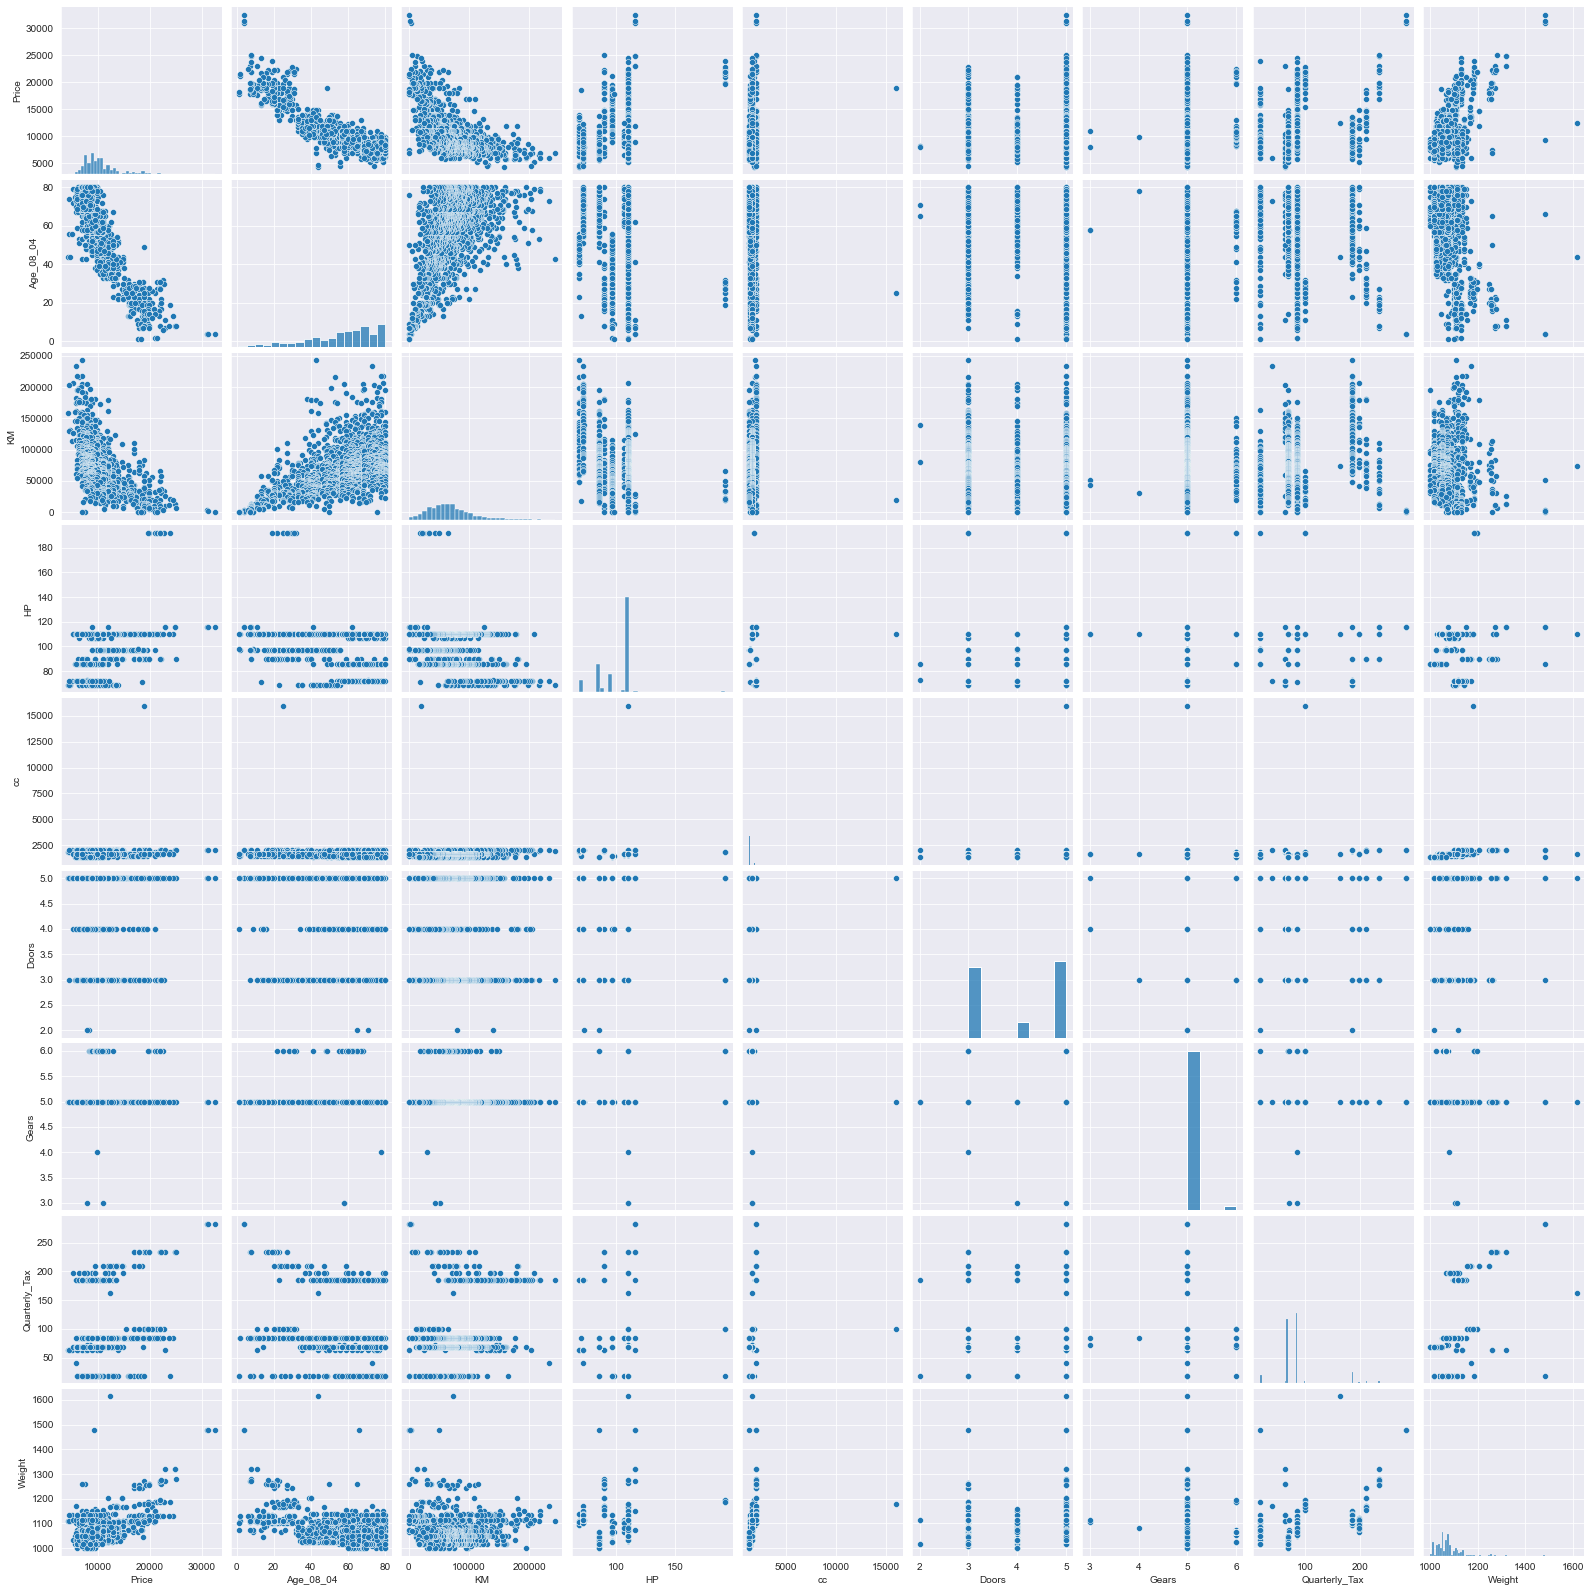

In [90]:
sns.pairplot(car1)

In [91]:
car2 = car1.rename({'Age_08_04':'Age' , 'cc':'CC' , 'Quarterly_Tax':'QT',  },axis=1)
car2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Age', ylabel='Price'>,
        <AxesSubplot:xlabel='KM', ylabel='Price'>,
        <AxesSubplot:xlabel='HP', ylabel='Price'>,
        <AxesSubplot:xlabel='CC', ylabel='Price'>,
        <AxesSubplot:xlabel='Doors', ylabel='Price'>,
        <AxesSubplot:xlabel='Gears', ylabel='Price'>,
        <AxesSubplot:xlabel='QT', ylabel='Price'>,
        <AxesSubplot:xlabel='Weight', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='KM', ylabel='Age'>,
        <AxesSubplot:xlabel='HP', ylabel='Age'>,
        <AxesSubplot:xlabel='CC', ylabel='Age'>,
        <AxesSubplot:xlabel='Doors', ylabel='Age'>,
        <AxesSubplot:xlabel='Gears', ylabel='Age'>,
        <AxesSubplot:xlabel='QT', ylabel='Age'>,
        <AxesSubplot:xlabel='Weight', ylabel='Age'>],
       [<AxesSubplot:xlabel='Price', ylabel='KM'>,
        <AxesSubplo

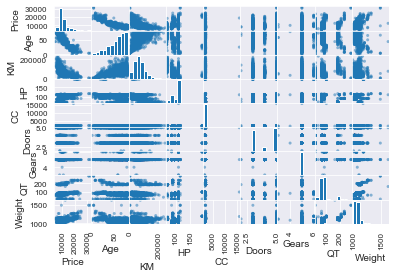

In [92]:
pd.plotting.scatter_matrix(car2)

In [93]:
car2[car2.duplicated()].shape

(1, 9)

In [94]:
car2[car2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [95]:
car3 = car2.drop_duplicates().reset_index(drop=True)
car3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [96]:
car3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation

In [97]:
car3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Fitting Model

In [98]:
# Bulid Model

model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=car3).fit()

In [99]:
# Finding Coefficient Parameters

model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:38:10   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# Finding tvalues and pvalues

model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [102]:
# Finding rsquared values

model.rsquared , model.rsquared_adj  # Model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

# Simple Linear Regression Model

In [103]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

ml_c=smf.ols('Price~CC' , data=car3).fit()
ml_c.tvalues , ml_c.pvalues    # CC has significant pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [104]:
ml_d=smf.ols('Price~Doors' , data=car3).fit()
ml_d.tvalues , ml_d.pvalues   # Doors has significant pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [105]:
mlr_cd=smf.ols('Price~CC+Doors' , data=car3).fit()
mlr_cd.tvalues , mlr_cd.pvalues    # CC & Doors have segnificant pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Correlation Matrix

In [106]:
car3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


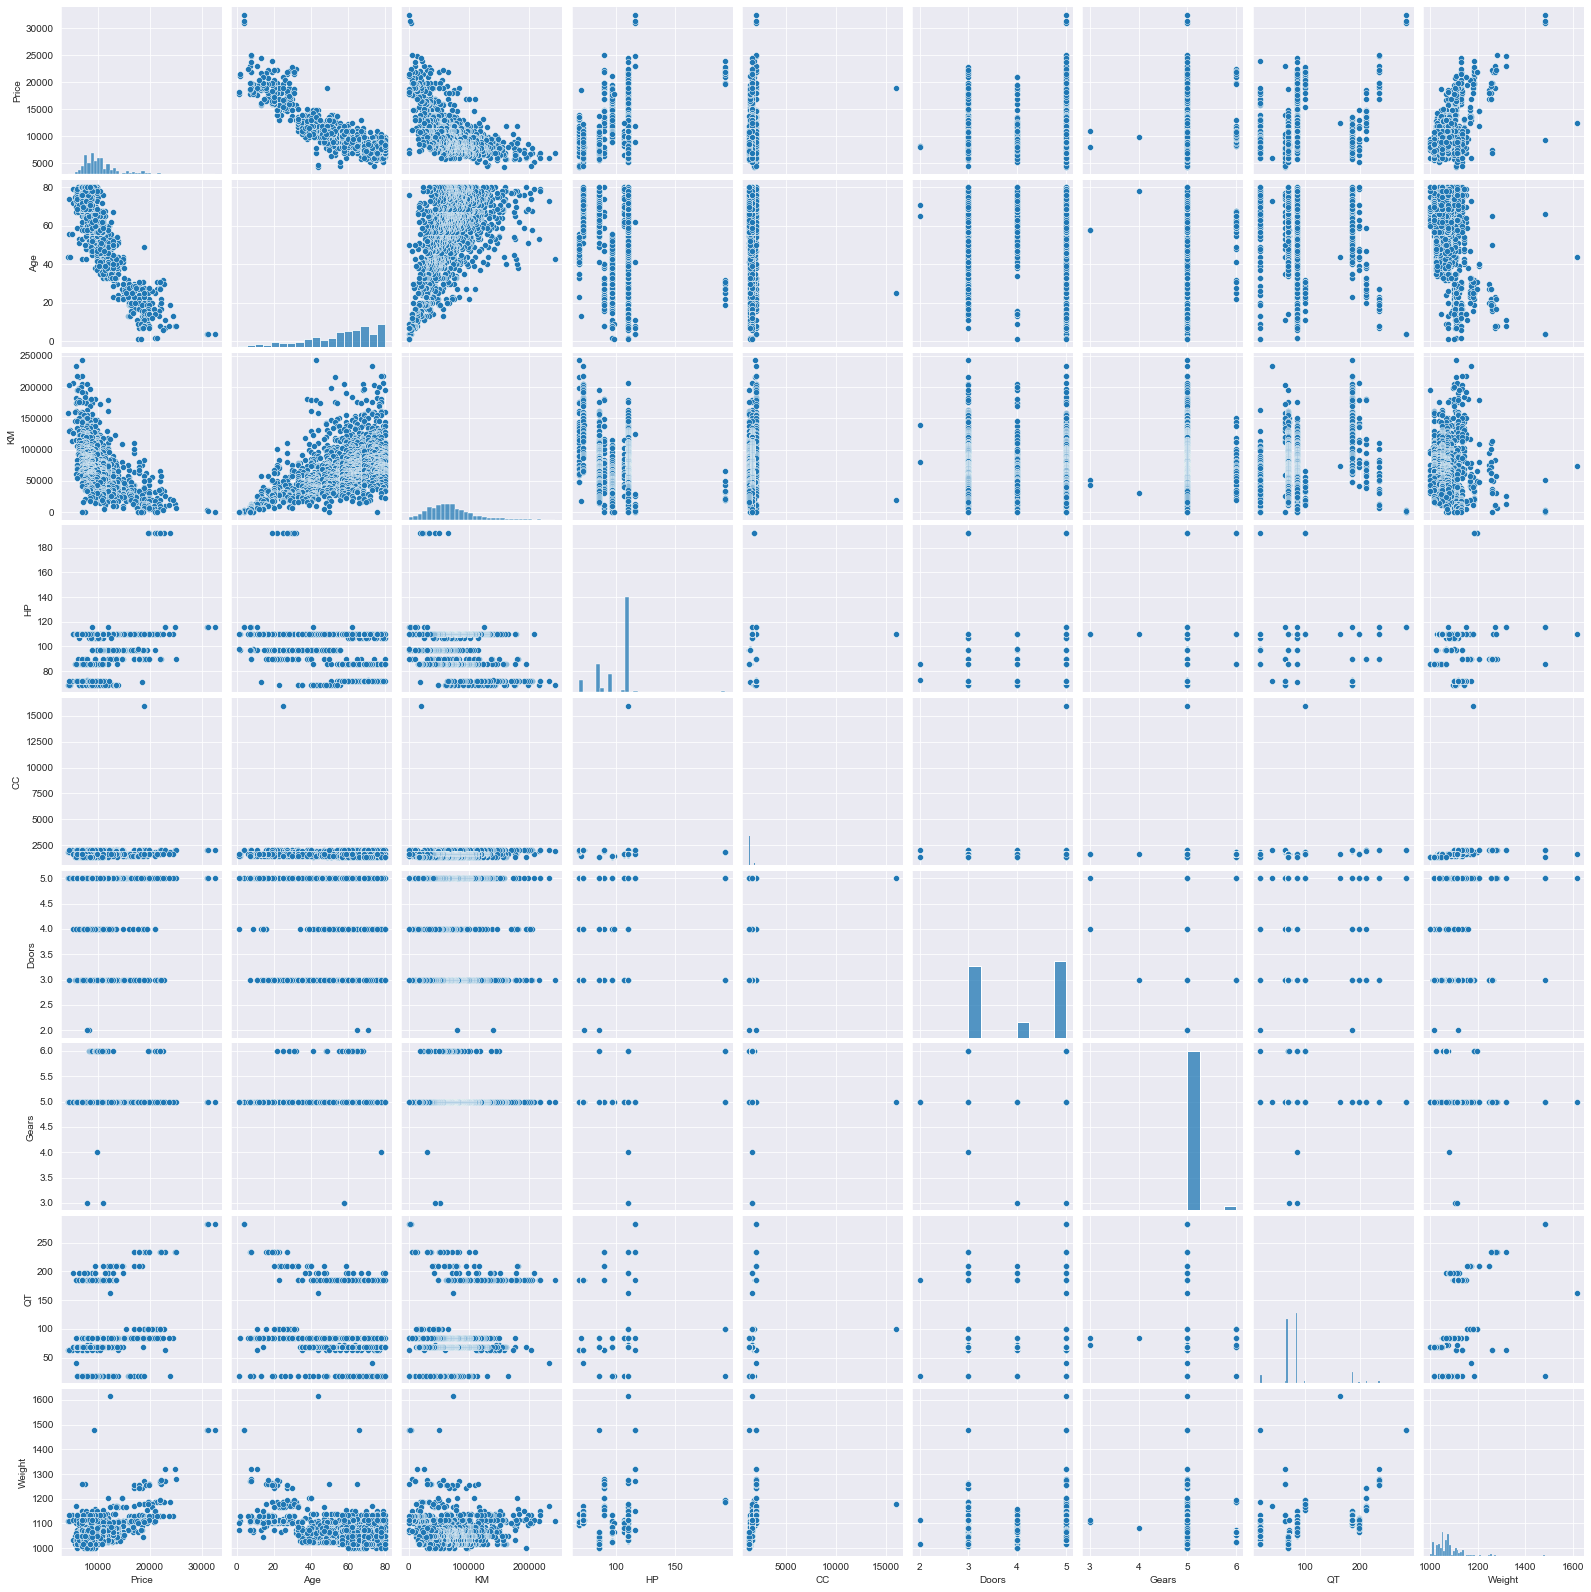

In [108]:
# Format the plot background and scatter plots for all the variables

sns.set_style(style='darkgrid')
sns.pairplot(car3)

# Model Validation Technique

Collinearity & Residual analysis

# Calculate VIF

In [109]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=car3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=car3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=car3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=car3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=car3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=car3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=car3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=car3).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}

Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


^None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis

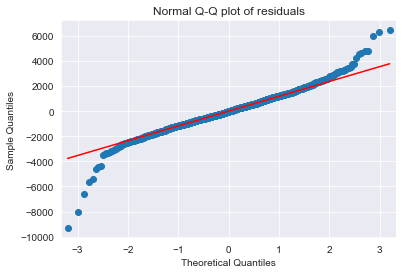

In [114]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')    # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [115]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residual

[array([109, 146, 522], dtype=int64)]

In [116]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Residual plot of Homoscedascity

In [117]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standardized_values(vals) :
    return (vals - vals.mean())/vals.std()  # User defined z = (x - mu)/

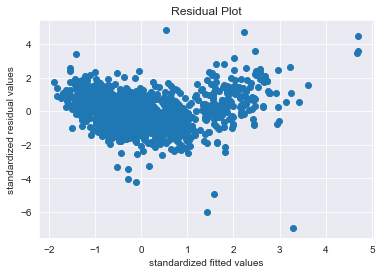

In [118]:
plt.scatter(get_standardized_values(model.fittedvalues),
             get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

 Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
 using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)   

# Residual vs Regressor

eval_env: 1


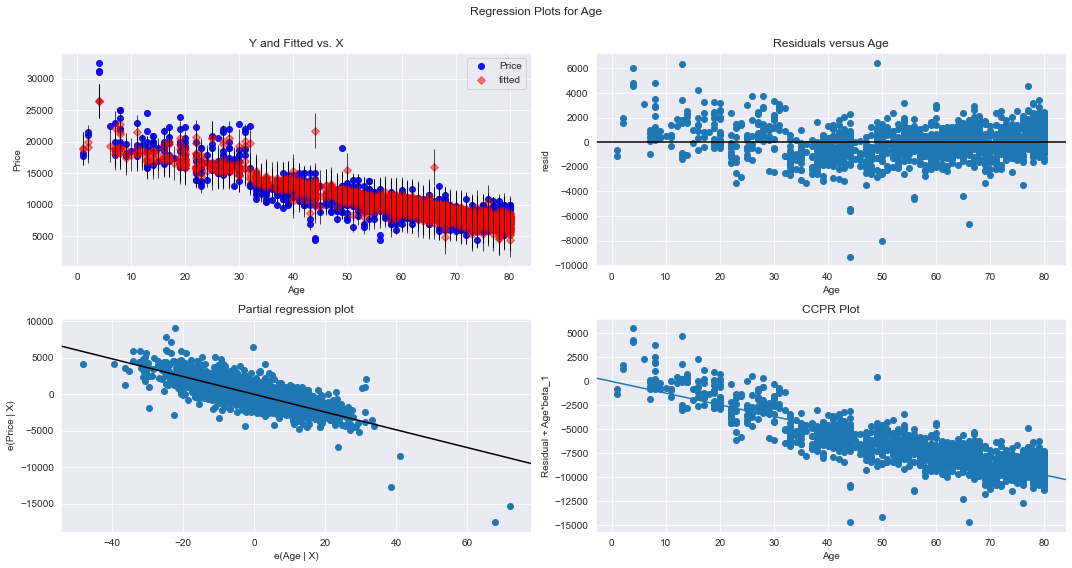

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


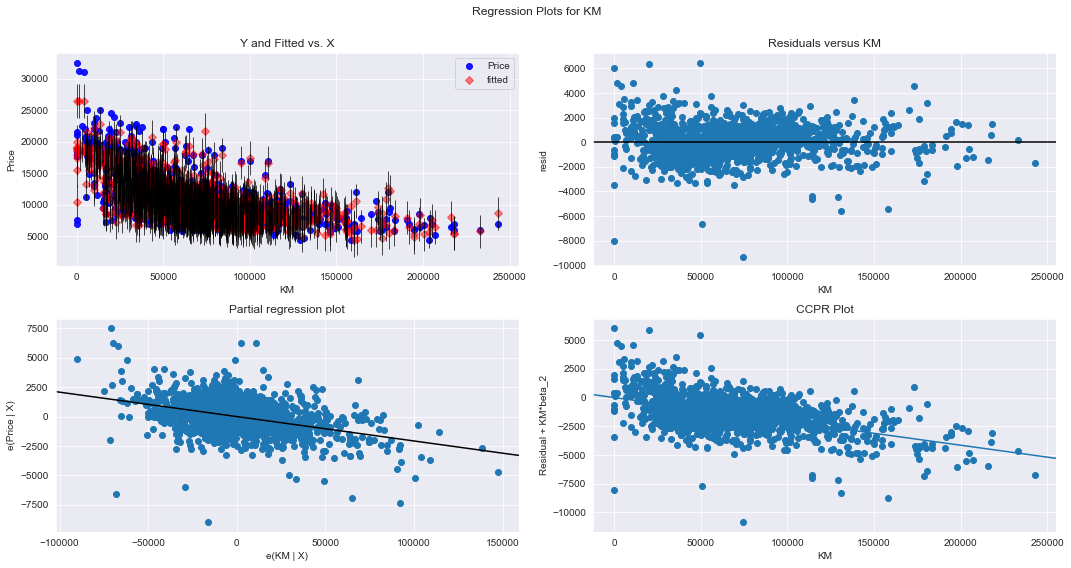

In [120]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


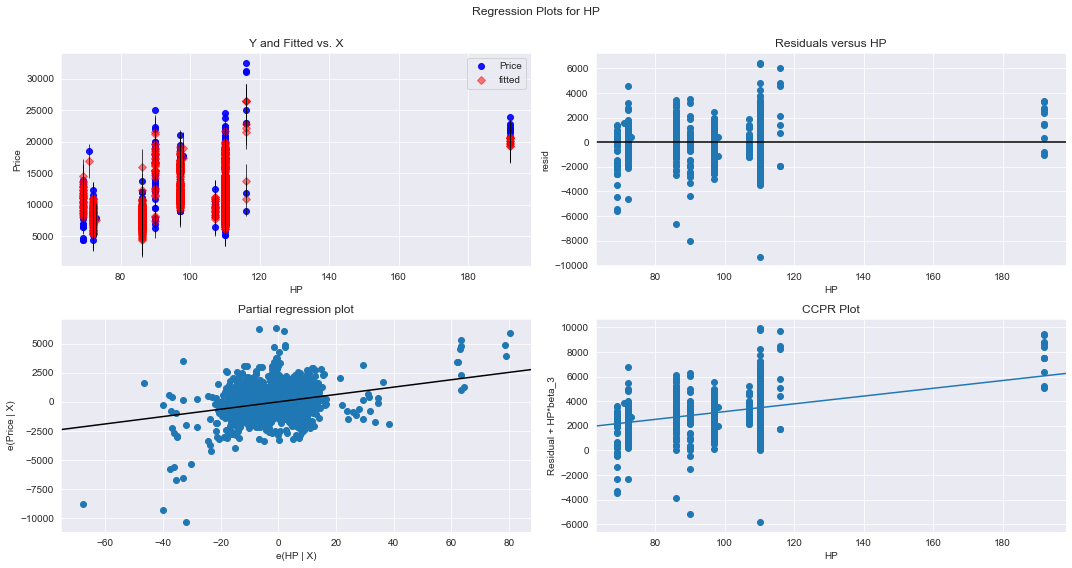

In [121]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


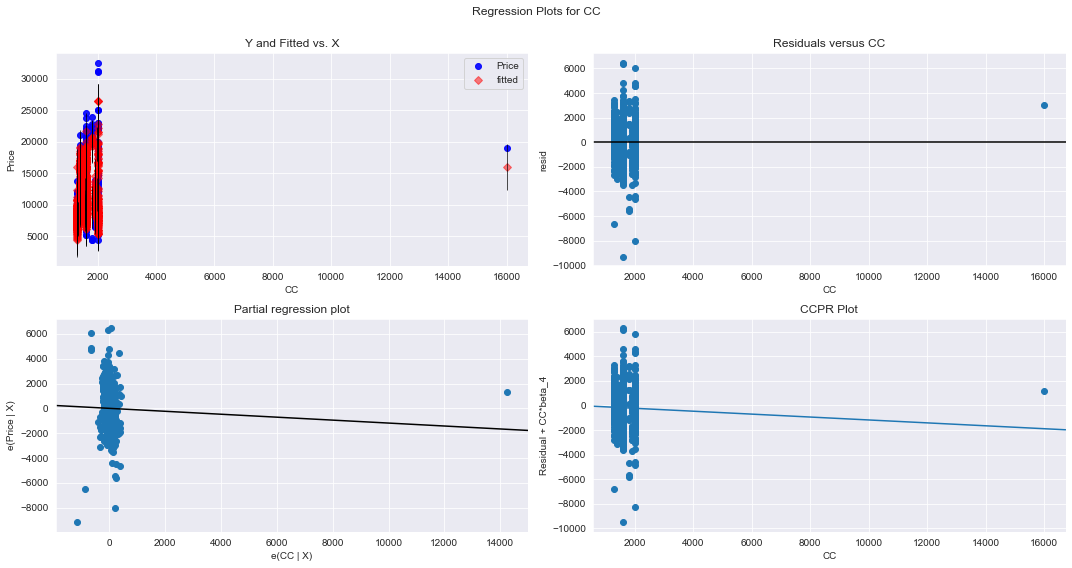

In [122]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


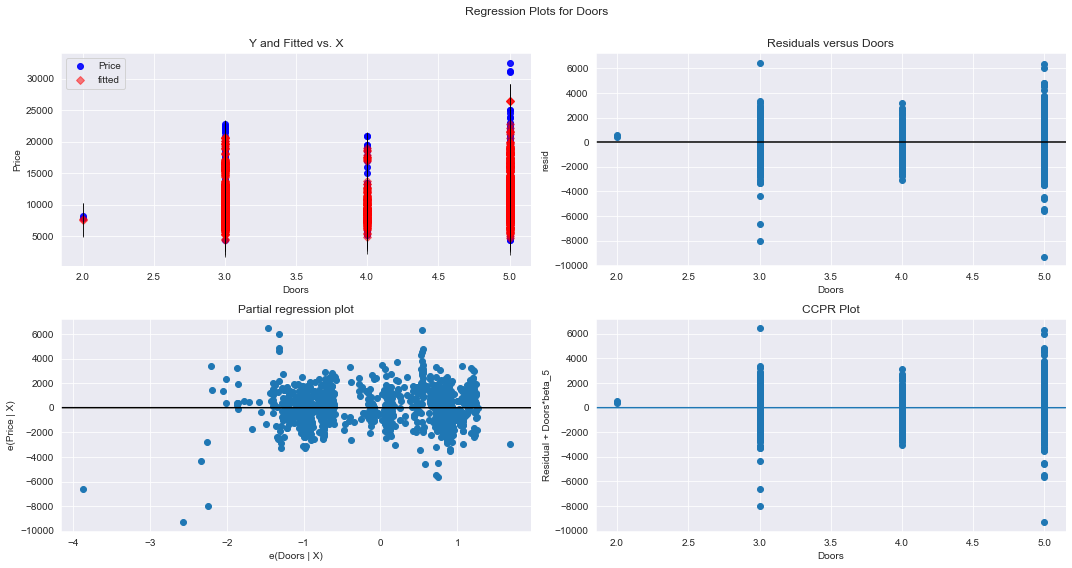

In [123]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


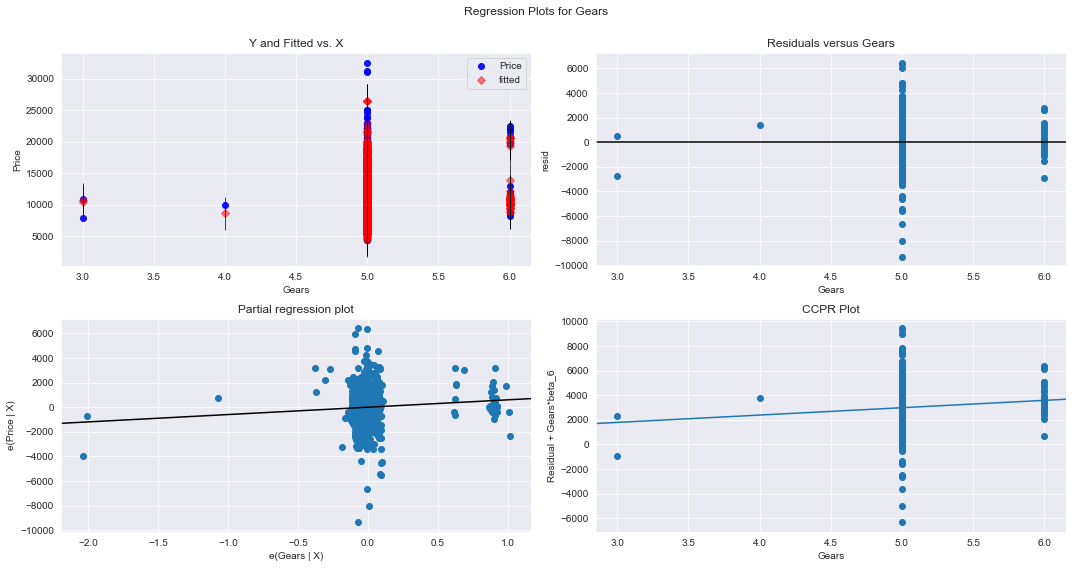

In [124]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


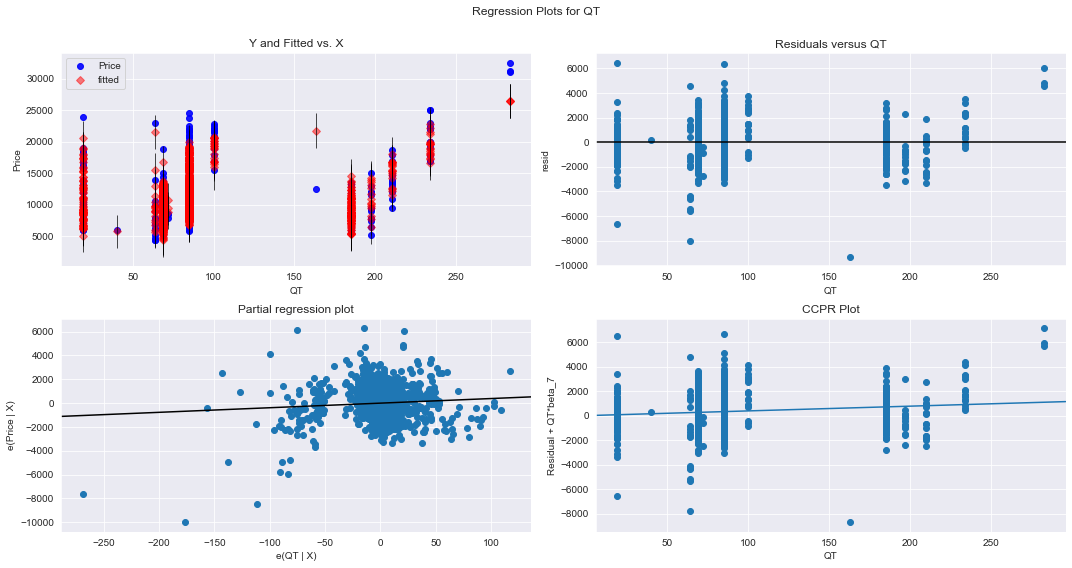

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


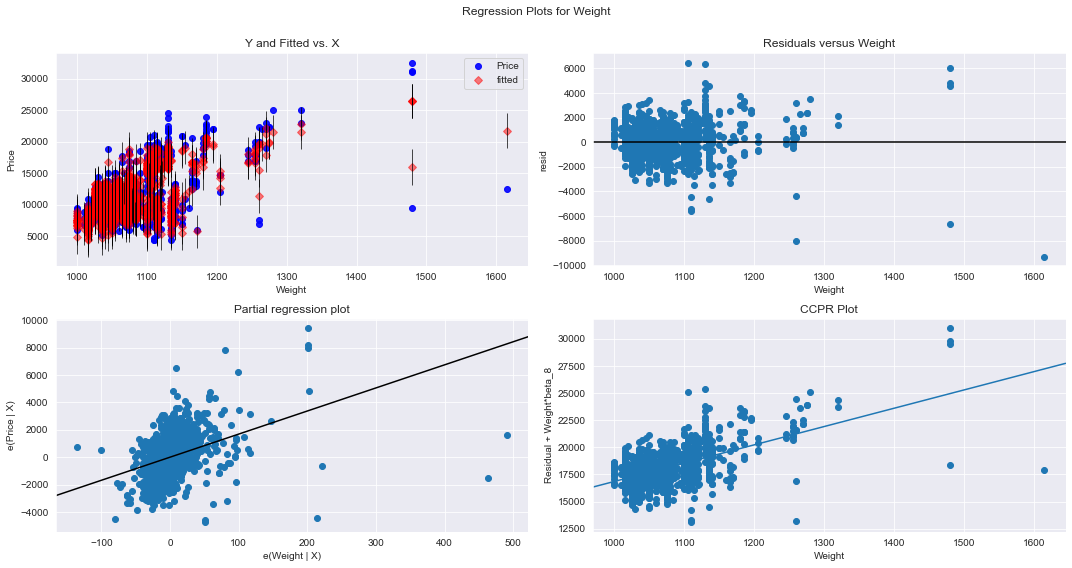

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics(checking Outlies or influencers)

using Cook's Distance or Leverage value

# Cook's Distance

In [127]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

model_influence = model.get_influence()
(c, _) = model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

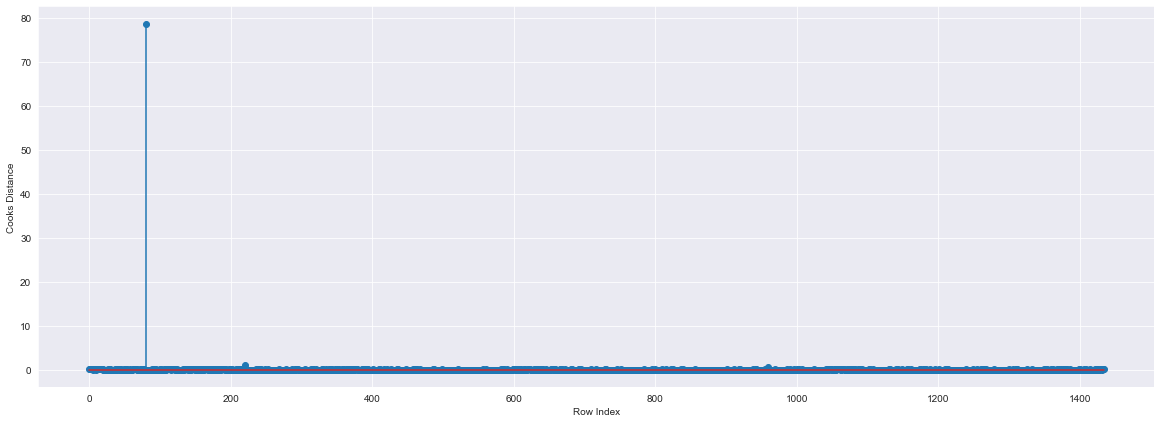

In [128]:
# Plot the influencers using the stem plot

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(car3)) , np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [129]:
# Index and value of influencer where C>0.5

(np.argmax(c) , np.max(c))

(80, 78.7295058224916)

# High Influence points

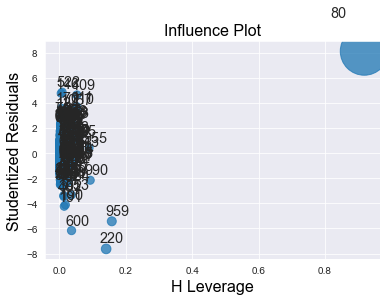

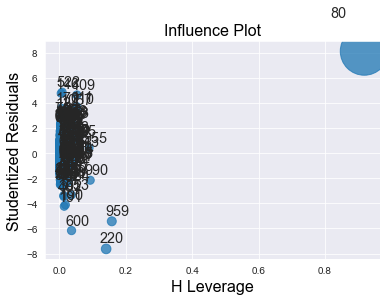

In [130]:
sm.graphics.influence_plot(model)

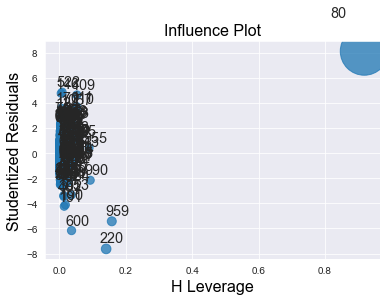

In [131]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [132]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

k=car3.shape[1]
n=car3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [133]:
car3[car3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# New Model

In [134]:
# Creating a copy of data so that original dataset is not affected 

car_new=car3.copy()
car_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [135]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

car4 = car_new.drop(car_new.index[[80]],axis=0).reset_index(drop=True)
car4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final model

In [136]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=car4).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        car4=car4.drop(car4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        car4
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=car4).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [137]:
final_model.rsquared    # Model Accuracy is increased to 90.02%

0.9003762532318559

In [138]:
car4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Prediction

In [139]:
# say New data for prediction is

new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [140]:
# Manual Prediction of Price

final_model.predict(new_data)

0    14398.815471
dtype: float64

In [141]:
# Automatic Prediction of Price with 90.02% accurcy

pred_y=final_model.predict(car4)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64